# Assignment 4 Description

For this homework, you will be tasked with extending the Seattle weather graph from class (see Brightspace for the file).

**Tasks**

1. Modify the top graph so that if you click a weather name in the legend, all data points with different weather types are greyed out. 

2. Modify the bottom chart to a stacked bar chart showing the precipitation on each selected date.

You can refer to the example gallery and user guide of Altair for this project. 

Example Gallery: https://altair-viz.github.io/gallery/index.html

# Example Solution Images

# Task 1

Selecting the "sun" (yellow) weather type in the legend.

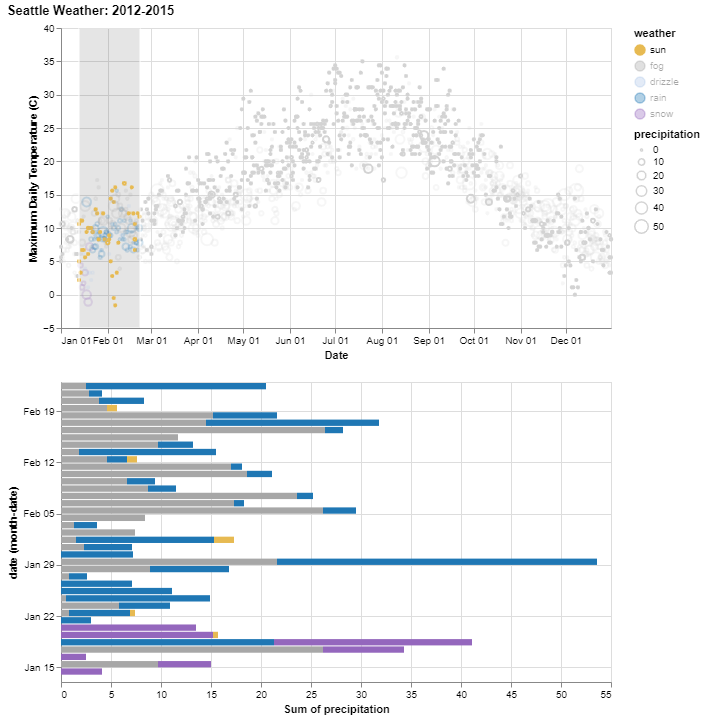

#Task 2
Selecting an interval in the top plot.

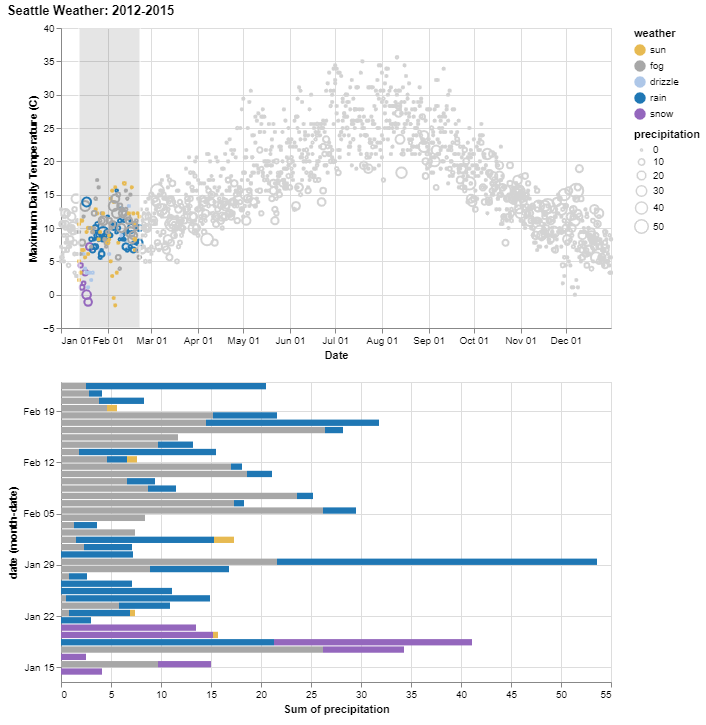

#Bonus Task
Selecting a bar that corresponds to "rain" (blue) in the bottom graph (no legend element selected).

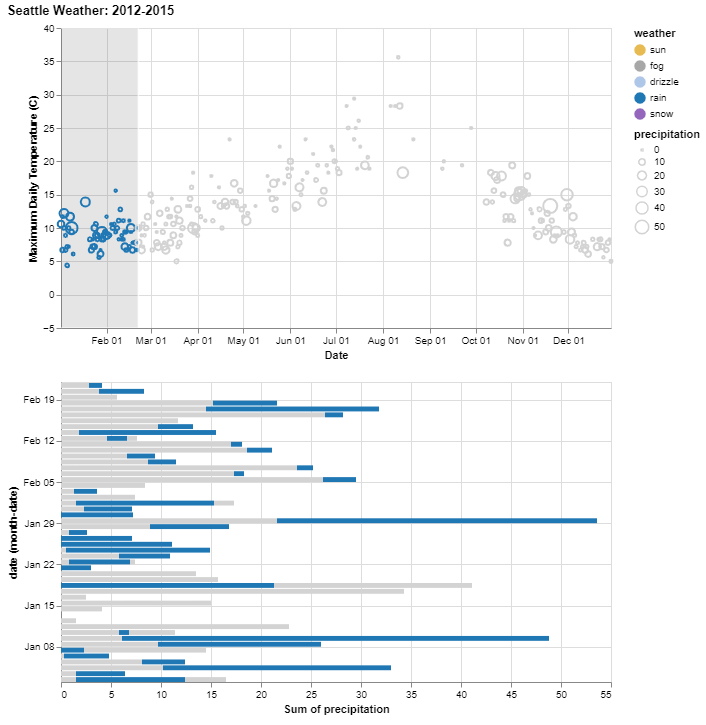

# Your Code Here

In [8]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('weather:N', scale=scale)

## Fill out


# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color']) # selection of weather types
lengend_select = alt.selection_multi(fields=['weather'], bind='legend')
# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('monthdate(date):T', title='Date'),
    alt.Y('temp_max:Q',
        title='Maximum Daily Temperature (C)',
        scale=alt.Scale(domain=[-5, 40])
    ),
    color=alt.condition(brush|lengend_select, color, alt.value('lightgray')),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[5, 200]))
).properties(
    width=550,
    height=300
).add_selection(
    brush
).add_selection(
    lengend_select
).transform_filter(
    click # filter based on selected weather types
)


# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    y=alt.Y('monthdate(date):T', title='Month of the year'),
    x='sum(precipitation):Q',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click # enable selection of weather types
)

alt.vconcat(
    points,
    bars,
    data=source,
    title="Seattle Weather: 2012-2015"
)


alt.VConcatChart(...)

# 新段落

In [2]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('weather:N', scale=scale)

In [3]:
source

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [12]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('weather:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color']) # selection of weather types
lengend_select = alt.selection_multi(fields=['weather'], bind='legend')
# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('monthdate(date):T', title='Date'),
    alt.Y('temp_max:Q',
        title='Maximum Daily Temperature (C)',
        scale=alt.Scale(domain=[-5, 40])
    ),
    color=alt.condition(brush|lengend_select, color, alt.value('lightgray')),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[5, 200]))
).properties(
    width=550,
    height=300
).add_selection(
    brush
).add_selection(
    lengend_select
).transform_filter(
    click # filter based on selected weather types
)


# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    y=alt.Y('monthdate(date):T', title='Month of the year'),
    x='sum(precipitation):Q',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click # enable selection of weather types
)

alt.vconcat(
    points,
    bars,
    data=source,
    title="Seattle Weather: 2012-2015"
)


alt.VConcatChart(...)